# Classification of three species of iris flower
Iris flower has three species ('SETOSA','VERSICOLR','VIRGINICA'). In this example we train an AI model to classify an Iris flower based on its data on Sepal Length, Sepal Width, Petal Length and Petal Width.
The model uses algorithm known as Support Vector classifier.
The accuracy is shown as 'Confusion Matrix' that counts true positives/negatives and false positive/negatives.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Note if you get an error importing any of the above packages then make sure you reinstall the latest version. For example, to reinstall the latest version of Numpy use the command  
pip install --upgrade numpy

In [2]:
#Importing of dataset to dataframe. 
df = pd.read_csv("IRIS.csv")

In [3]:
#To see first 5 rows of the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:

#To know the data types of the variables.
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Speceis is the output class,to know the count of each class we use value_counts()
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
#Separating independant variable and dependent variable("Species")
# Selecting 'Species' as the target variable.
X = df.drop(['Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 5)
(150,)


In [7]:
# Splitting the dataset to Train and test. Here 70% for training and 30% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 5)
(105,)
(45, 5)
(45,)


In [8]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [9]:
#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [10]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [11]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

Text(0.5, 15.0, 'Predicted Values')

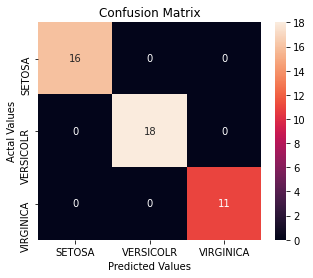

In [12]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')

### 1.Let us calculate the TP, TN, FP, FN values for the class Setosa using the Above tricks:

TP: The actual value and predicted value should be the same. So concerning Setosa class, the value of cell 1 is the TP value.

FN: The sum of values of corresponding rows except the TP value

FN = (cell 2 + cell3)

= (0 + 0)

= 0

FP : The sum of values of corresponding column except the TP value.

FP = (cell 4 + cell 7)

= (0 + 0)

= 0

TN: The sum of values of all columns and row except the values of that class that we are calculating the values for.

TN = (cell 5 + cell 6 + cell 8 + cell 9)

= 17 + 1 +0 + 11

= 29

### Similarly, for Versicolor class the values/ metrics are calculated as below:

TP : 17 (cell 5)

FN : 0 + 1 = 1 (cell 4 +cell 6)

FP : 0 + 0 = 0 (cell 2 + cell 8)

TN : 16 +0 +0 + 11 =27 (cell 1 + cell 3 + cell 7 + cell 9).